<a href="https://colab.research.google.com/github/anonymoususer2024/anonymoususer2024/blob/main/handwrittendigitpredictionybi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

In [97]:
import pandas as pd

In [98]:
import numpy as np

In [99]:
import matplotlib.pyplot as plt


# IMPORT DATA

In [100]:
from sklearn.datasets import load_digits

In [101]:
df=load_digits()

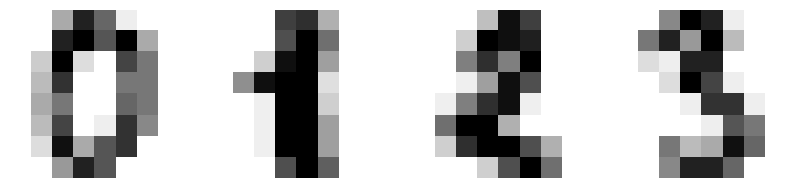

In [102]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

# **DATA PREPROCESSING**

In [103]:
df.images.shape

(1797, 8, 8)

In [104]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [105]:
df.images[0].shape


(8, 8)

In [106]:
len(df.images)

1797

In [107]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [108]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [109]:
data[0].shape

(64,)

In [110]:
data[0].shape

(64,)

In [111]:
data.shape

(1797, 64)

# **SCALING IMAGE DATA**

In [112]:
data.min()

0.0

In [113]:
data.max()

16.0

In [114]:
data=data/16

In [115]:
data.min()

0.0

In [116]:
data.max()

1.0

In [117]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **TRAIN TEST SPLIT**

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
from os import X_OK
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [120]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((1257, 64), (540, 64), (1257,), (540,))

In [121]:
# RANDOM FOREST MODEL

# RANDOM FOREST **MODEL**

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf=RandomForestClassifier()

In [124]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# PREDICT **DATA**

In [125]:
y_pred=rf.predict(x_test)

In [126]:
y_pred

array([0, 1, 4, 2, 3, 5, 4, 7, 2, 0, 8, 7, 4, 9, 5, 7, 5, 6, 0, 3, 5, 6,
       1, 9, 1, 9, 4, 2, 2, 1, 0, 9, 2, 8, 5, 2, 3, 1, 1, 2, 3, 8, 1, 4,
       7, 9, 4, 2, 4, 0, 0, 4, 9, 2, 2, 8, 4, 6, 6, 2, 2, 7, 0, 7, 4, 4,
       8, 5, 0, 8, 3, 6, 5, 1, 5, 9, 9, 8, 2, 3, 3, 4, 2, 2, 8, 7, 3, 7,
       6, 2, 6, 4, 5, 0, 0, 2, 8, 6, 5, 0, 8, 3, 0, 4, 9, 2, 3, 1, 4, 1,
       1, 1, 7, 1, 4, 4, 6, 0, 3, 5, 3, 3, 1, 2, 7, 2, 4, 8, 6, 1, 8, 7,
       2, 0, 6, 9, 7, 7, 9, 0, 7, 8, 6, 2, 0, 9, 3, 8, 9, 8, 9, 9, 7, 8,
       0, 5, 9, 1, 4, 4, 0, 1, 5, 5, 6, 3, 0, 3, 6, 7, 1, 3, 2, 7, 6, 3,
       0, 6, 8, 9, 7, 7, 1, 3, 9, 9, 5, 7, 4, 9, 5, 5, 8, 9, 4, 0, 9, 2,
       7, 7, 3, 7, 3, 5, 2, 6, 6, 8, 5, 8, 5, 4, 0, 7, 6, 0, 8, 8, 8, 6,
       5, 8, 0, 5, 4, 7, 0, 8, 1, 8, 1, 4, 4, 8, 8, 5, 1, 9, 2, 1, 3, 7,
       4, 4, 4, 1, 2, 9, 5, 4, 2, 6, 4, 2, 4, 7, 7, 6, 3, 5, 3, 7, 3, 0,
       1, 2, 8, 4, 4, 0, 8, 7, 2, 6, 0, 4, 3, 0, 7, 0, 9, 5, 1, 6, 8, 8,
       1, 2, 5, 2, 6, 4, 2, 5, 7, 4, 0, 8, 8, 2, 5,

# MODEL **ACCURACY**

In [129]:
from sklearn.metrics  import confusion_matrix,classification_report

In [130]:
confusion_matrix(y_test,y_pred)

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 56,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 48,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 58,  0],
       [ 0,  1,  0,  2,  0,  1,  0,  2,  0, 50]])

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.91      1.00      0.95        50
           2       1.00      0.97      0.98        58
           3       0.96      0.98      0.97        45
           4       0.97      0.97      0.97        61
           5       0.98      0.96      0.97        50
           6       1.00      1.00      1.00        48
           7       0.95      1.00      0.97        52
           8       0.95      0.95      0.95        61
           9       1.00      0.89      0.94        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.91      1.00      0.95        50
           2       1.00      0.97      0.98        58
           3       0.96      0.98      0.97        45
           4       0.97      0.97      0.97        61
           5       0.98      0.96      0.97        50
           6       1.00      1.00      1.00        48
           7       0.95      1.00      0.97        52
           8       0.95      0.95      0.95        61
           9       1.00      0.89      0.94        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

